In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

A regressão linear é uma técnica estatística usada para modelar a relação linear entre duas variáveis, uma variável independente (X) e uma variável dependente (Y). O objetivo é encontrar a linha de melhor ajuste que minimize a soma dos quadrados das diferenças entre os valores observados de Y e os valores preditos pela equação da linha.

A equação geral da regressão linear simples é representada por:

Y=mx+b

Onde:

Y é a variável dependente,
X é a variável independente,
m é o coeficiente angular (inclinação) da linha,
b é o coeficiente linear (intercepto) da linha.
A análise de regressão permite fazer previsões ou inferências sobre o valor da variável dependente com base nos valores da variável independente.

In [2]:
df = df=pd.read_csv ('/kaggle/input/gold-forecasting/GoldUP.csv')
df.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [3]:
df.shape

(239, 8)

In [4]:
df.describe()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


Esse gráfico abaixo mostra a relação entre as variáveis Gold_Price (eixo x) e Crude_Oil (eixo y) com a adição de uma linha de regressão linear. Este tipo de gráfico é útil para visualizar a tendência ou relação linear entre as duas variáveis.

Ao observar o gráfico, você pode tirar algumas conclusões:

Direção da relação: Se a linha de regressão inclina para cima, indica uma relação positiva entre as variáveis, o que significa que, em geral, à medida que o preço do ouro (Gold_Price) aumenta, o preço do petróleo bruto (Crude_Oil) também tende a aumentar. Se inclina para baixo, indicaria uma relação negativa.

Força da relação: Quão apertada ou dispersa a nuvem de pontos está ao redor da linha de regressão pode dar uma ideia da força da relação. Uma nuvem de pontos mais apertada sugere uma relação mais forte.

Outliers: Observar se existem pontos discrepantes (outliers) que podem influenciar a análise. Outliers podem ser pontos que se desviam significativamente da tendência geral.

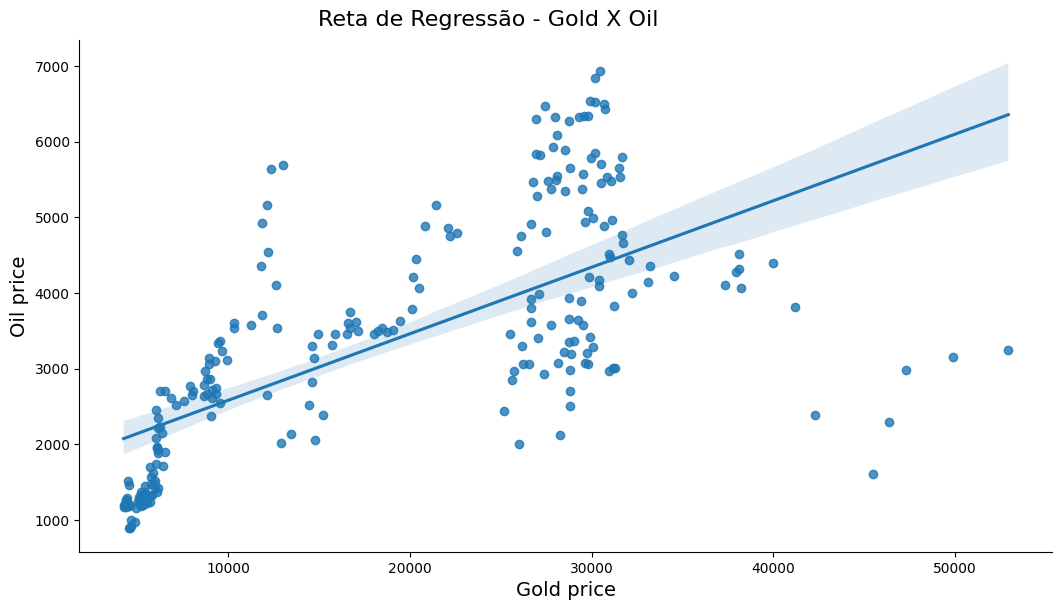

In [5]:
ax = sns.lmplot(x="Gold_Price", y="Crude_Oil", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X Oil', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("Oil price", fontsize=14)
ax

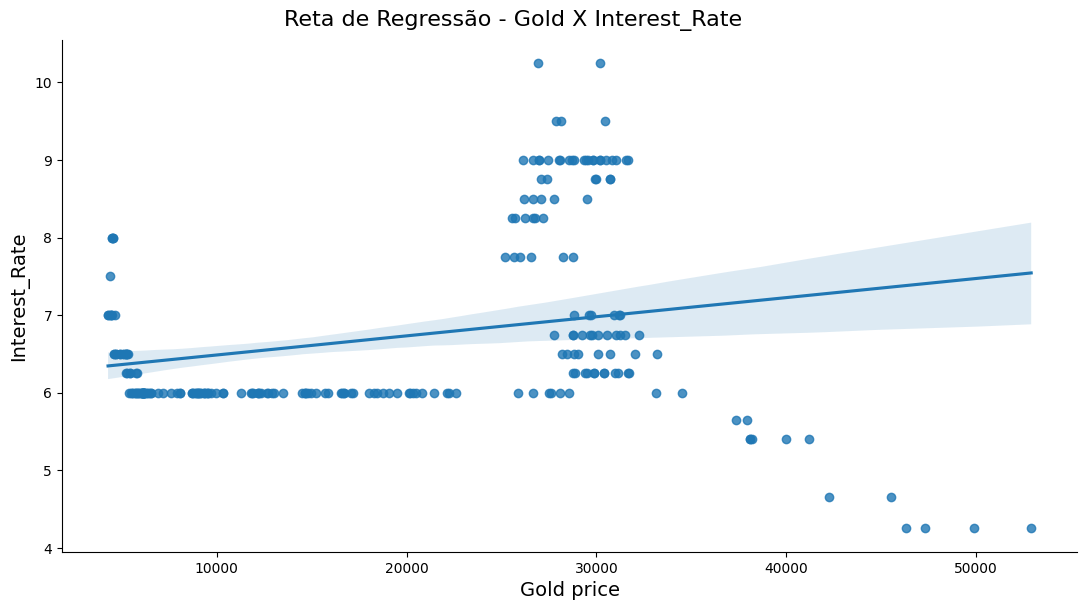

In [6]:
ax = sns.lmplot(x="Gold_Price", y="Interest_Rate", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X Interest_Rate', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("Interest_Rate", fontsize=14)
ax

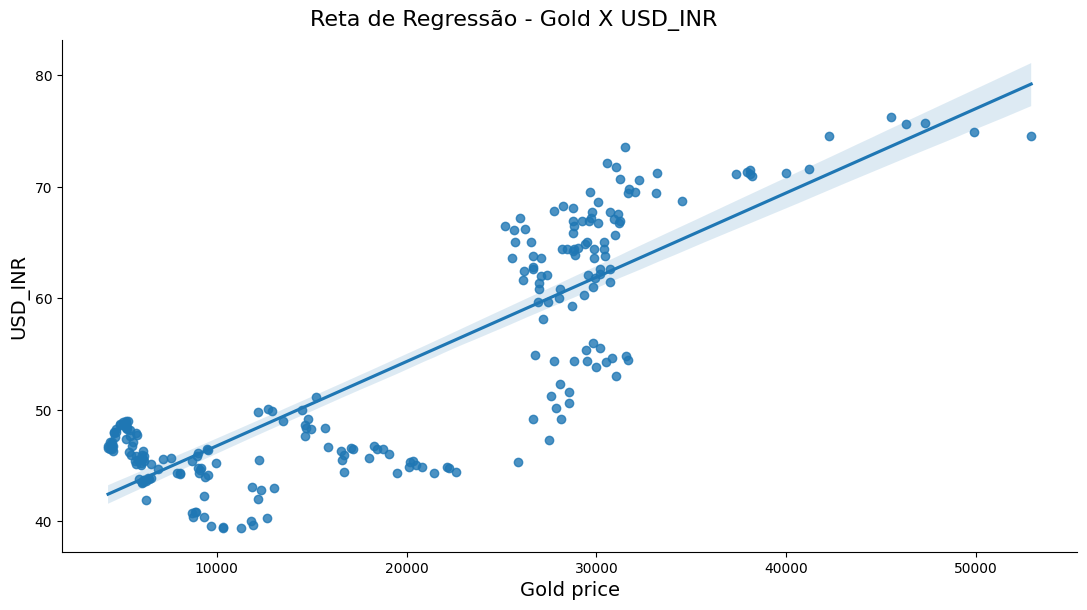

In [7]:
ax = sns.lmplot(x="Gold_Price", y="USD_INR", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X USD_INR', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("USD_INR", fontsize=14)
ax

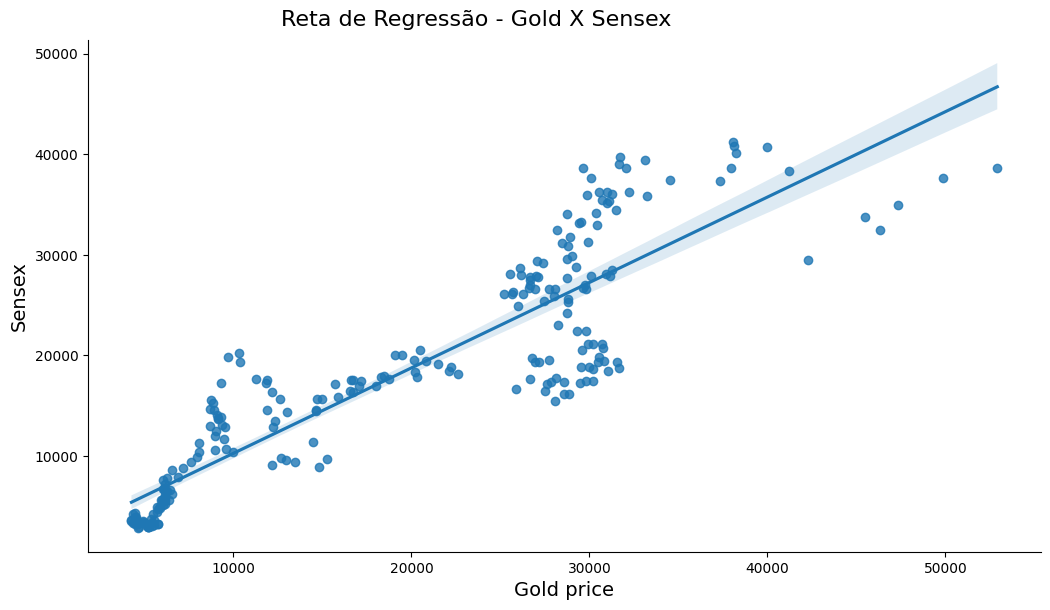

In [8]:
ax = sns.lmplot(x="Gold_Price", y="Sensex", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X Sensex', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("Sensex", fontsize=14)
ax

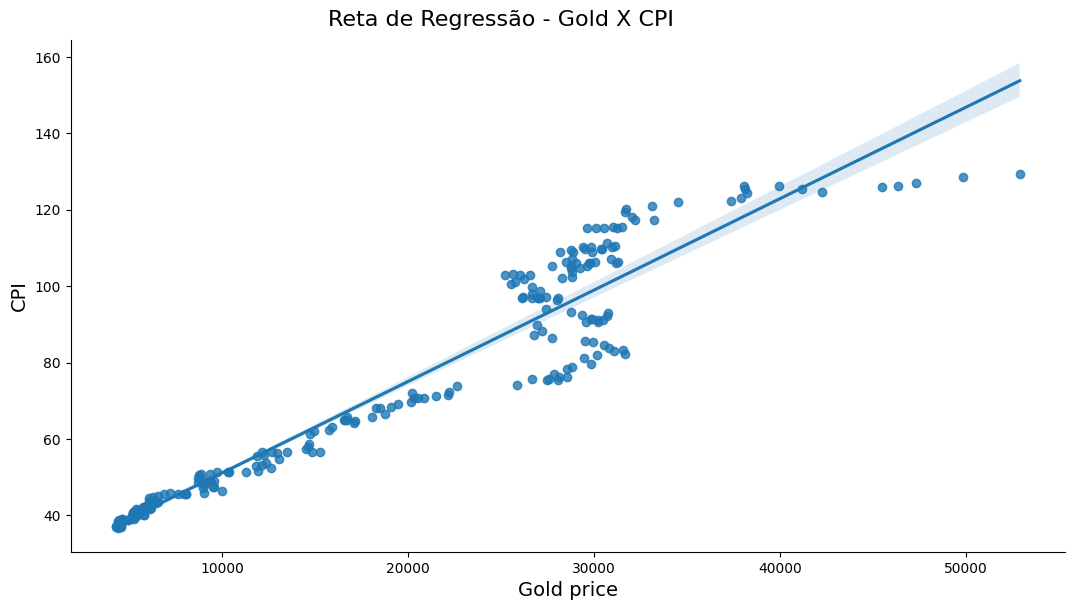

In [9]:
ax = sns.lmplot(x="Gold_Price", y="CPI", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X CPI', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("CPI", fontsize=14)
ax

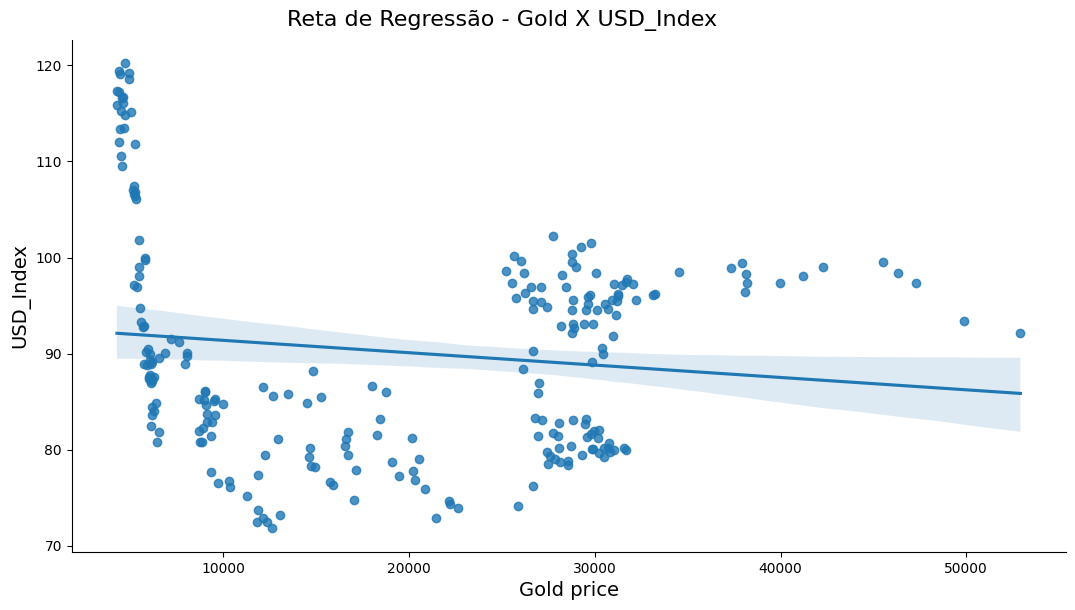

In [10]:
ax = sns.lmplot(x="Gold_Price", y="USD_Index", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gold X USD_Index', fontsize=16, y=1.02)
ax.set_xlabels("Gold price", fontsize=14)
ax.set_ylabels("USD_Index", fontsize=14)
ax

Agora vamos adicionar uma constante (intercepto) à variável Sensex usando sm.add_constant do statsmodels. Isso geralmente é feito ao ajustar um modelo de regressão linear para incluir o termo constante na equação

In [11]:
Y = df.Gold_Price
X = sm.add_constant(df.Sensex)

Agora vamos ajustar o modelo de regressão linear utilizando sm.OLS(Y, X).fit()

In [12]:
resultado_regressao = sm.OLS(Y, X).fit()

In [13]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             Gold_Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     981.4
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           3.17e-86
Time:                        16:43:19   Log-Likelihood:                -2381.1
No. Observations:                 239   AIC:                             4766.
Df Residuals:                     237   BIC:                             4773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2048.1861    643.821      3.181      0.0

Nessa primeira análise temos algumas variáveis a prestar atenção:
R-squared (R²): O R² é uma medida da variabilidade da variável dependente que é explicada pelo modelo. Neste caso, R² é 0.805, o que significa que aproximadamente 80.5% da variabilidade em Gold_Price é explicada pela variável Sensex neste modelo.

Coeficientes: Os coeficientes fornecem informações sobre a inclinação da linha de regressão. Para a constante (intercepto), o valor é 2048.1861, e para Sensex é 0.9493. Isso significa que, em média, para cada aumento de uma unidade em Sensex, espera-se um aumento de 0.9493 unidades em Gold_Price.

P-values: Os p-values associados aos coeficientes indicam a probabilidade de observar um efeito tão extremo quanto o observado, supondo que o coeficiente seja realmente zero (nenhum efeito). Valores pequenos (geralmente < 0.05) indicam que o coeficiente é estatisticamente significativo. Ambos os coeficientes (const e Sensex) têm p-values muito pequenos, indicando que são estatisticamente significativos.

F-statistic: Este valor (981.4) é usado para testar a significância global do modelo. Valores maiores indicam que pelo menos uma variável independente está relacionada à variável dependente. O p-value associado (3.17e-86) é muito pequeno, indicando que o modelo como um todo é estatisticamente significativo.

Prob(Omnibus) e Prob(JB): Esses valores estão associados aos testes de normalidade dos resíduos. Valores pequenos indicam que os resíduos não seguem uma distribuição normal. Neste caso, ambos os valores são pequenos, sugerindo desvios da normalidade.

Durbin-Watson: Esse teste avalia a presença de autocorrelação nos resíduos. Valores próximos a 2 indicam ausência de autocorrelação. Neste caso, o valor é muito baixo (0.077), sugerindo possível autocorrelação positiva nos resíduos.

In [14]:
df['Y_previsto'] = resultado_regressao.predict()
df

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index,Y_previsto
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65,5571.011582
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24,5843.428660
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56,5818.870589
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52,6155.487991
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01,6079.848751
...,...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57,34055.906543
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34,32827.983975
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39,35193.324026
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35,37747.942543


uma coluna chamada Y_previsto ao DataFrame df, preenchendo-a com os valores previstos pelo modelo de regressão linear. Isso é uma prática comum após ajustar um modelo, pois permite comparar visualmente as previsões do modelo com os valores reais.

Agora, a coluna Y_previsto no DataFrame contém as previsões do modelo para a variável dependente Gold_Price com base nos valores da variável independente Sensex. 

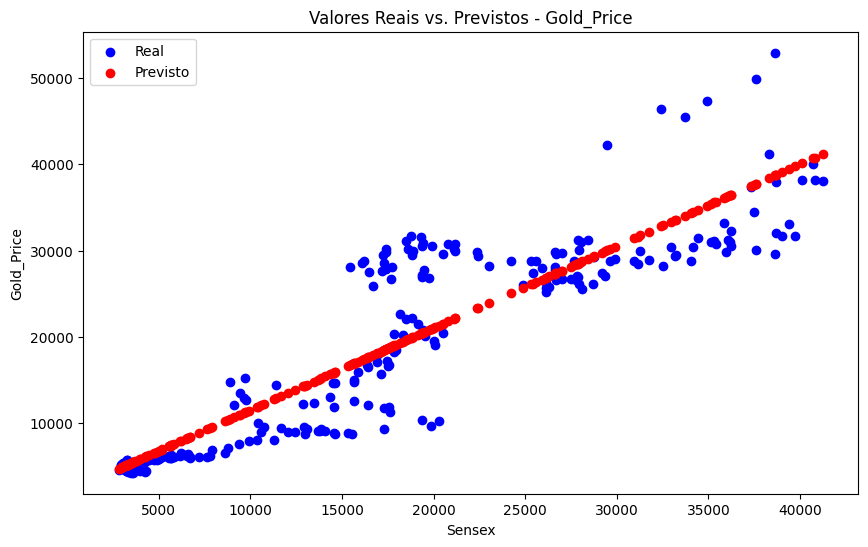

In [78]:
import matplotlib.pyplot as plt

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(df['Sensex'], df['Gold_Price'], label='Real', color='blue')
plt.scatter(df['Sensex'], df['Y_previsto'], label='Previsto', color='red')
plt.title('Valores Reais vs. Previstos - Gold_Price')
plt.xlabel('Sensex')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()


comparação visual entre os valores reais de Gold_Price e os valores previstos (Y_previsto) usando um gráfico de dispersão

In [15]:
amostra = df.query('Gold_Price < 6712').sample(n = 20, random_state = 101)

df.query('Gold_Price < 6712'): Isso filtra o DataFrame df apenas para as linhas onde o valor da coluna Gold_Price é inferior a 6712. Isso cria um subconjunto do DataFrame onde o preço do ouro é inferior a 6712.
.sample(n=20, random_state=101): Isso pega uma amostra aleatória de 20 observações do subconjunto criado anteriormente. O parâmetro random_state é usado para garantir a reprodutibilidade da amostra aleatória. O valor 101 é um número arbitrário e poderia ser qualquer valor.

In [16]:
amostra[['Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR','Sensex','CPI','USD_Index']].cov()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
Gold_Price,374368.555263,207684.482947,-285.688816,-911.129356,7.479215e+05,1258.002000,-7085.321421
Crude_Oil,207684.482947,209541.502017,-105.553842,-801.612317,6.249479e+05,851.267661,-4273.517271
Interest_Rate,-285.688816,-105.553842,0.351809,0.431783,-3.928809e+02,-1.065342,4.685118
USD_INR,-911.129356,-801.612317,0.431783,4.073876,-3.051615e+03,-3.609763,20.894632
Sensex,747921.495421,624947.889456,-392.880934,-3051.615033,2.485353e+06,2877.370531,-15837.147001
CPI,1258.002000,851.267661,-1.065342,-3.609763,2.877371e+03,5.045815,-24.539669
USD_Index,-7085.321421,-4273.517271,4.685118,20.894632,-1.583715e+04,-24.539669,149.294957


Valores positivos significativos nas covariâncias entre "Gold_Price" e outras variáveis indicam uma relação positiva. Valores negativos indicam uma relação negativa.
Por exemplo, uma covariância positiva significativa entre "Gold_Price" e "Sensex" sugere que essas variáveis tendem a variar juntas, enquanto uma covariância negativa com "USD_Index" sugere uma relação inversa.

In [17]:
amostra.Gold_Price.var()

374368.5552631579

O resultado que você obteve, 374368.5552631579, é a variância da variável "Gold_Price" na sua amostra. A variância é uma medida estatística que indica o quão dispersos são os valores em torno da média. Neste contexto de regressão linear, a variância da variável dependente ("Gold_Price") tem algumas implicações:

Dispersão dos Valores:

Quanto maior a variância, mais dispersos estão os valores da variável "Gold_Price" em relação à sua média.
Valores de variância maiores indicam uma maior variabilidade nos dados.
Importância na Regressão:

Na regressão linear, a variância da variável dependente é um componente essencial para calcular a dispersão dos pontos em torno da linha de regressão.
Modelos de regressão buscam minimizar a soma dos quadrados dos resíduos, e essa soma é diretamente relacionada à variância da variável dependente.
Avaliação do Ajuste do Modelo:

Uma variância alta pode indicar que os pontos de dados estão mais dispersos e pode ser mais desafiador ajustar um modelo que capture adequadamente essa variabilidade.
Modelos com baixa variância podem ter um ajuste mais fácil, pois os pontos tendem a se agrupar mais próximos à linha de regressão.
Interpretação do Resultado:

No seu caso específico, uma variância de 374368.5552631579 indica que os valores de "Gold_Price" na sua amostra têm uma dispersão considerável.

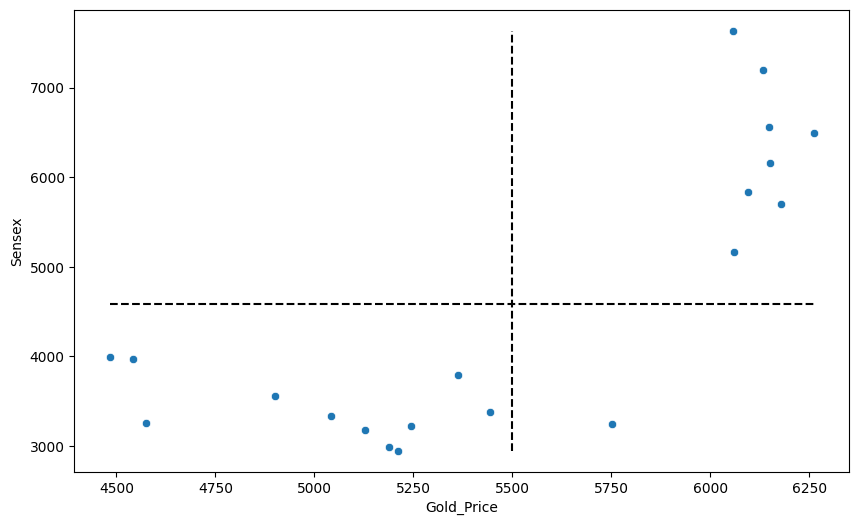

In [18]:
x = amostra.Gold_Price
y = amostra.Sensex
ax = sns.scatterplot(data=amostra, x='Gold_Price', y='Sensex')

ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

Pontos de Dispersão: Cada ponto no gráfico representa uma observação na amostra, onde a posição do ponto é determinada pelos valores de Gold_Price (eixo x) e Sensex (eixo y). A dispersão dos pontos pode indicar a força e direção da relação entre as variáveis.

Linha Horizontal e Vertical (Médias): As linhas horizontais e verticais pontilhadas representam as médias das variáveis Sensex e Gold_Price, respectivamente. Essas linhas podem ser úteis para avaliar como os pontos se distribuem em relação às médias, indicando se há uma tendência geral.

Tendência Visual: Ao observar o padrão geral dos pontos, você pode ter uma ideia visual da relação entre Gold_Price e Sensex. Se a dispersão dos pontos segue uma tendência específica (por exemplo, inclinação para cima ou para baixo), isso sugere uma relação linear.

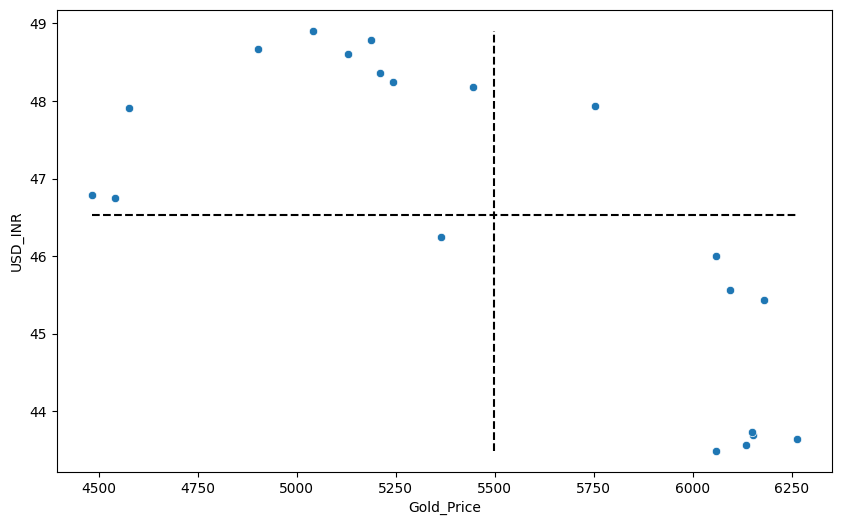

In [19]:
x = amostra.Gold_Price
y = amostra.USD_INR
ax = sns.scatterplot(data=amostra, x='Gold_Price', y='USD_INR')

ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

In [21]:
s_xy = df[['Gold_Price', 'Sensex']].cov()
s_xy

,Gold_Price,Sensex
Gold_Price,1.361635e+08,1.155374e+08
Sensex,1.155374e+08,1.217096e+08


In [22]:
s_xy= s_xy.Gold_Price.loc['Sensex']
s_xy

115537404.1838304

In [23]:
s_x = df.Gold_Price.std()
s_y = df.Sensex.std()

Coeficiente de Pearson

O coeficiente de correlação (Pearson): Mede a força e a direção de uma relação linear entre duas variáveis. Ele varia de -1 a 1, onde 1 indica uma relação linear positiva perfeita, -1 indica uma relação linear negativa perfeita e 0 indica ausência de relação linear.

In [24]:
r_xy = s_xy / ( s_x * s_y)
r_xy

0.8974903744638374

No seu caso, o coeficiente de correlação de Pearson entre "Gold_Price" e "Sensex" é 0.8975. Isso indica uma correlação positiva bastante forte entre essas duas variáveis. 

Vejamos um exemplo de uma correlação muito forte feita artificialmente

In [26]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}
dataset = pd.DataFrame(dataset)

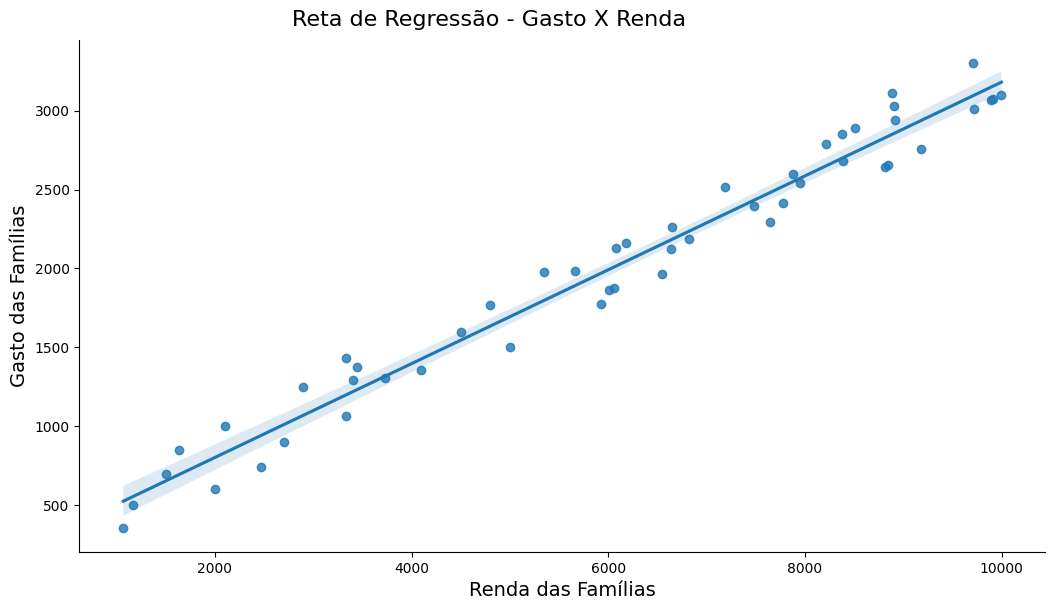

In [27]:
ax = sns.lmplot(data=dataset,x="X", y="Y")
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

ax = sns.lmplot(data=dataset, x="X", y="Y"): Cria um gráfico de dispersão com uma linha de regressão linear usando a biblioteca Seaborn. O eixo x é a variável "X" e o eixo y é a variável "Y" do seu conjunto de dados.

ax.fig.set_size_inches(12, 6): Define o tamanho da figura para 12 polegadas de largura por 6 polegadas de altura.

ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02): Adiciona um título à figura.

ax.set_xlabels("Renda das Famílias", fontsize=14): Define o rótulo do eixo x.

ax.set_ylabels("Gasto das Famílias", fontsize=14): Define o rótulo do eixo y.

O gráfico de dispersão com a linha de regressão ajuda a visualizar a relação entre as variáveis "X" e "Y". A linha de regressão tenta modelar a tendência geral nos dados.

In [28]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


A correlação desses dados imaginários é

In [29]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [30]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [31]:
beta_1 = resultado_regressao.params[0]

In [32]:
beta_2 = resultado_regressao.params[1]

In [33]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [34]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [35]:
#testar dentro da amostra
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X

In [36]:
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()

In [37]:
dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True)

In [38]:
def prever(x):
  return beta_1 + beta_2 * x

In [39]:
prever(7510)

2440.556403140435

Y = dataset.Y e X = sm.add_constant(dataset.X): Definem as variáveis dependentes (Y) e independentes (X) para a regressão. A função add_constant adiciona uma constante ao termo independente.

resultado_regressao = sm.OLS(Y, X, missing='drop').fit(): Ajusta o modelo de regressão linear utilizando o método dos mínimos quadrados ordinários (OLS).

beta_1 = resultado_regressao.params[0] e beta_2 = resultado_regressao.params[1]: Obtêm os coeficientes da regressão (intercepto e inclinação).

resultado_regressao.conf_int(alpha=0.05): Calcula os intervalos de confiança para os coeficientes da regressão com um nível de confiança de 95%.

dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X: Calcula os valores previstos utilizando a equação da regressão linear.

dataset['Y_previsto_statsmodels'] = resultado_regressao.predict(): Calcula os valores previstos utilizando o método predict do Statsmodels.

dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True): Remove a coluna Y_previsto_statsmodels do DataFrame dataset.

def prever(x): return beta_1 + beta_2 * x: Define uma função prever que permite prever um valor de Y para um determinado valor de X com base nos coeficientes da regressão.

prever(7510): Usa a função prever para prever o valor de Y para X = 7510.

In [40]:
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

In [41]:
dataset['u'] = dataset.Y - dataset.Y_previsto

Resíduos (u): Os resíduos representam as diferenças entre os valores observados da variável dependente (Y) e os valores previstos pelo modelo de regressão (Y_previsto). Matematicamente, os resíduos são calculados como 
�
=
�
−
�
previsto
u=Y−Y 
previsto
​
 .

Significado dos Resíduos: Cada valor de u representa o quanto o modelo está errado para uma observação específica. Se o modelo de regressão fosse perfeito, os resíduos seriam todos zero. No entanto, na prática, sempre haverá alguma discrepância entre os valores observados e os valores previstos.

Análise dos Resíduos: A análise dos resíduos é uma parte importante da validação de um modelo de regressão. Alguns aspectos a serem considerados incluem:

Homocedasticidade: A dispersão dos resíduos deve ser constante em todos os níveis da variável independente.
Normalidade: Os resíduos devem se aproximar de uma distribuição normal.
Independência: Os resíduos não devem mostrar padrões ou autocorrelação.
Detecção de Padrões ou Violações: Se houver padrões nos resíduos, isso pode indicar que o modelo não está capturando completamente a relação subjacente nos dados. Padrões nos resíduos podem sugerir formas de melhorar o modelo.

Avaliação do Desempenho do Modelo: Os resíduos também são usados para calcular métricas de desempenho do modelo, como o erro médio quadrático (RMSE) ou o coeficiente de determinação (R²).

In [42]:
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [43]:
dataset['Residuos'] = resultado_regressao.resid

armazenando os resíduos diretamente a partir do objeto resultado_regressao que foi gerado após ajustar o modelo de regressão linear. A utilização de resultado_regressao.resid é outra maneira de obter os resíduos associados ao modelo. Essa abordagem é equivalente à criação manual dos resíduos como dataset['u'] = dataset.Y - dataset.Y_previsto.

In [44]:
dataset.head()

,Y,X,Y_previsto,u,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [45]:
dataset.drop(['u'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


<Axes: title={'center': 'Resíduos vs Variável Independente'}, xlabel='X', ylabel='Resíduos'>

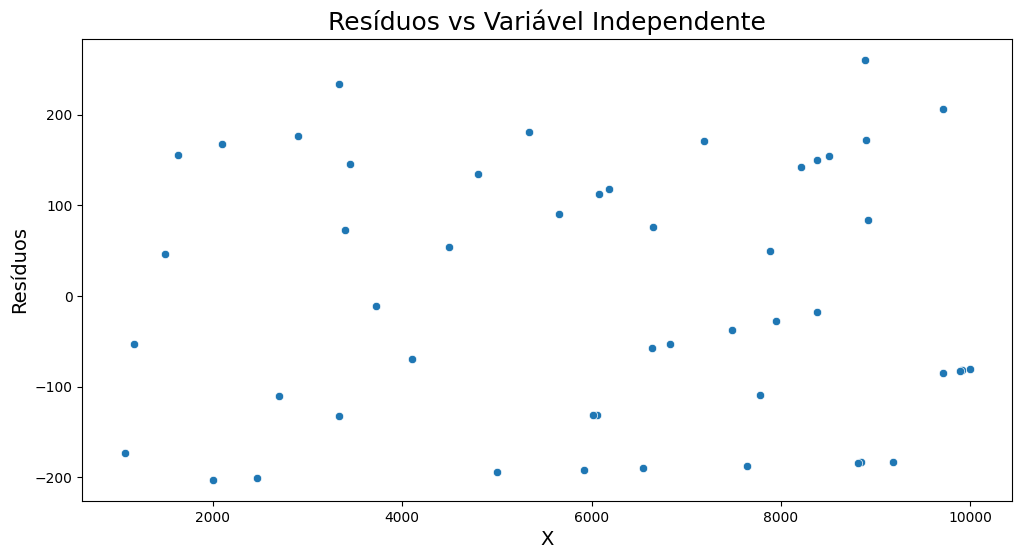

In [46]:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Este gráfico é uma ferramenta comum para visualizar padrões nos resíduos e para verificar se as suposições da regressão linear estão sendo atendidas. Algumas interpretações comuns ao analisar um gráfico de resíduos versus variável independente incluem:

Homocedasticidade: A dispersão dos resíduos deve ser aproximadamente constante em todos os níveis da variável independente. Se a dispersão dos resíduos aumenta ou diminui à medida que X aumenta, isso pode indicar heterocedasticidade.

Independência dos Resíduos: Os resíduos não devem exibir padrões discerníveis, e não deve haver autocorrelação evidente. Se houver padrões ou tendências nos resíduos em relação a X, isso pode indicar violações das suposições do modelo.

Normalidade: Embora o gráfico de dispersão não forneça uma avaliação direta da normalidade dos resíduos, padrões incomuns podem indicar que a distribuição dos resíduos pode não ser normal.

<Axes: title={'center': 'Resíduos vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

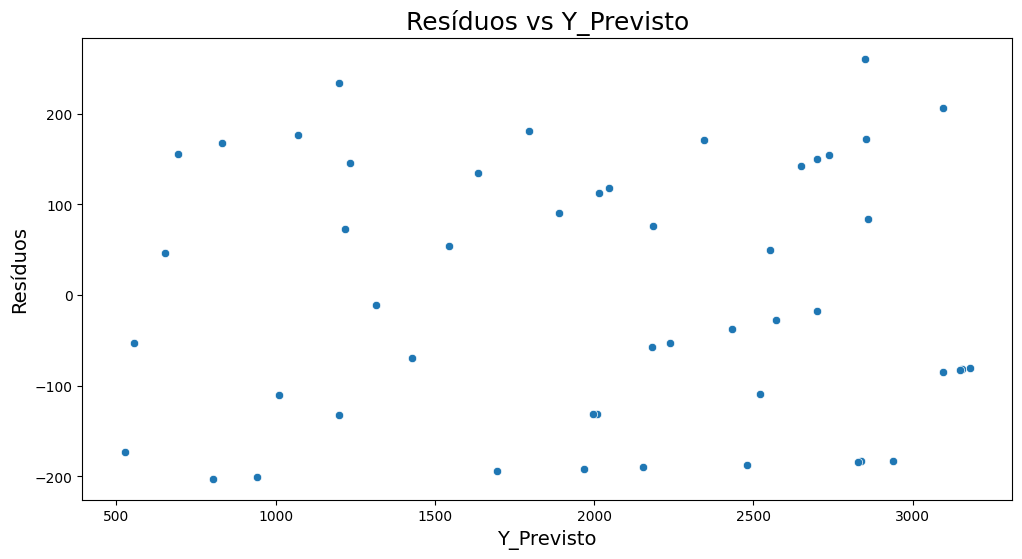

In [47]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Essa fórmula calcula a soma dos quadrados dos resíduos, representando a variação não explicada pelo modelo.

In [48]:
SQE = dataset.Residuos.apply(lambda u: u**2).sum()
SQE

984986.0375191914

Essa fórmula calcula a soma dos quadrados devido ao modelo, representando a variação explicada pelo modelo.

In [49]:
# Utilizando o ssr (sum of squared residuals) do statsmodels
resultado_regressao.ssr

984986.0375191915

Essa fórmula calcula a soma total dos quadrados, representando a variação total na variável dependente.

In [50]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQT

32724149.279999997

In [51]:
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQR

31739163.24248083

In [52]:
# Utilizando o ess (explained sum of squares) do statsmodels
resultado_regressao.ess

31739163.242480807

resultado_regressao.ssr: Representa a soma dos quadrados devido ao erro calculada pelo Statsmodels.
resultado_regressao.ess: Representa a soma dos quadrados devido ao modelo (explicada) calculada pelo Statsmodels.

In [53]:
resultado_regressao.rsquared

0.9699003317369297

O coeficiente de determinação (R²) é a proporção da variação total explicada pelo modelo.
Essas fórmulas são úteis para entender como a variação total em Y é decomposta em componentes explicados pelo modelo e não explicados (erro). O R² fornece uma medida padronizada da qualidade do ajuste do modelo.

Está lá nosso R² igualzinho, no finalzinho estão as casas decimais um pouco diferentes, mas não tem problema, 0,96, ou seja, 96,9, 97%, praticamente, é o nosso R²

Estimadores de Mínimos Quadrados (Least Squares Estimators, em inglês) são utilizados em estatística e econometria para encontrar os parâmetros de um modelo que minimizam a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo. Essa técnica é frequentemente aplicada em modelos de regressão linear, onde se busca ajustar uma reta (ou plano, em modelos multidimensionais) aos dados observados.

In [54]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           3.56e-38
Time:                        16:43:22   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [55]:
EQM = resultado_regressao.mse_resid
EQM

20520.54244831649

O EQM representa a média dos quadrados dos resíduos (erros). É uma medida de dispersão dos resíduos ao redor da linha de regressão. Valores menores indicam um ajuste melhor do modelo aos dados.

In [56]:
s = np.sqrt(resultado_regressao.mse_resid)
s

143.24993001155877

O desvio padrão dos resíduos é a raiz quadrada do EQM. Ele fornece uma medida absoluta da dispersão dos resíduos e é útil para avaliar a precisão das previsões do modelo.

In [57]:
SOMA_DESVIO2 = dataset.X.apply(lambda x: (x - dataset.X.mean())**2).sum()
SOMA_DESVIO2

359114426.5

Isso calcula a soma dos quadrados dos desvios de cada valor de X em relação à média de X. Esse valor é frequentemente usado em cálculos relacionados à inferência sobre os parâmetros do modelo.

In [58]:
s_beta_2 = s / np.sqrt(SOMA_DESVIO2)
s_beta_2

0.00755923753376846

O erro padrão do coeficiente de inclinação é uma medida da variabilidade esperada nos estimadores de inclinação. Ele é usado em intervalos de confiança e testes de hipóteses sobre a inclinação da regressão.

In [59]:
from scipy.stats import t as t_student

A importação do módulo t da biblioteca scipy.stats indica que você está interessado em utilizar a distribuição t de Student em suas análises estatísticas. A distribuição t de Student é comumente utilizada em inferência estatística, especialmente quando o tamanho da amostra é pequeno e a variabilidade populacional é desconhecida.

In [60]:
confianca = 0.95
significancia = 1 - confianca

In [61]:
graus_de_liberdade = resultado_regressao.df_resid
graus_de_liberdade

48.0

In [62]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [63]:
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha_2

2.0106347546964454

In [64]:
t = (beta_2 - 0) / s_beta_2
t

39.328131926755034

In [65]:
resultado_regressao.tvalues[1]

39.32813192675501

In [66]:
t <= -t_alpha_2

False

In [67]:
t >= t_alpha_2

True

In [68]:
p_valor = 2 * (t_student.sf(t, graus_de_liberdade))
p_valor

3.555543228585887e-38

In [69]:
p_valor = resultado_regressao.pvalues[1]
p_valor

3.5555432285859883e-38

In [70]:
p_valor <= significancia

True

In [71]:
resultado_regressao.mse_model

31739163.242480807

In [72]:
resultado_regressao.mse_resid

20520.54244831649

In [73]:
resultado_regressao.mse_resid

20520.54244831649

In [74]:
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

1546.7019608482472

In [75]:
resultado_regressao.fvalue

1546.7019608482472

In [76]:
resultado_regressao.f_pvalue

3.5555432285860227e-38

In [77]:
p_valor <= 0.05

True

Intervalo de Confiança para o Coeficiente de Inclinação

confianca = 0.95: Define o nível de confiança do intervalo.
significancia = 1 - confianca: Determina o nível de significância.
graus_de_liberdade = resultado_regressao.df_resid: Obtém os graus de liberdade residuais.
probabilidade = (0.5 + (confianca / 2)): Calcula a probabilidade associada ao intervalo de confiança.
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade): Obtém o valor crítico da distribuição t para o intervalo de confiança.
Os cálculos são utilizados para construir o intervalo de confiança para o coeficiente de inclinação 
Teste de Hipótese para o Coeficiente de Inclinação

t = (beta_2 - 0) / s_beta_2: Calcula a estatística t do teste de hipótese.
resultado_regressao.tvalues[1]: Obtém a estatística t diretamente do resultado da regressão.
p_valor = 2 * (t_student.sf(t, graus_de_liberdade)): Calcula o valor p usando a distribuição t.
p_valor = resultado_regressao.pvalues[1]: Obtém o valor p diretamente do resultado da regressão.
Esses cálculos são utilizados para realizar um teste de hipótese sobre a significância estatística do coeficiente de inclinação.
Comparação das Médias dos Quadrados (MSE):

resultado_regressao.mse_model: MSE associado ao modelo.
resultado_regressao.mse_resid: MSE associado aos resíduos.
F = resultado_regressao.mse_model / resultado_regressao.mse_resid: Calcula a estatística F para o teste de significância global do modelo.
resultado_regressao.fvalue: Obtém a estatística F diretamente do resultado da regressão.
resultado_regressao.f_pvalue: Obtém o valor p associado ao teste F diretamente do resultado da regressão.
Esses cálculos são utilizados para realizar um teste de significância global do modelo.
Em resumo:

Os primeiros cálculos estão relacionados à inferência sobre o coeficiente de inclinação, incluindo a construção de intervalos de confiança e testes de hipóteses.
Os últimos cálculos envolvem a comparação das médias dos quadrados para avaliar a significância global do modelo.